<a href="https://colab.research.google.com/github/Navn33t2k1/Customer-Personality-Analysis/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title:Customer Personality Analysis**
## **Objective:**
 The objective of the "Customer Personality Analysis" project is to analyze the company's ideal customers and provide actionable insights for personalized marketing strategies, enhanced customer engagement, and strategic decision-making. By segmenting the customer base, developing detailed personas, analyzing behavior, and evaluating sentiment, the project aims to drive business growth and foster long-term customer relationships.

## **Introduction:**

In the modern business landscape, understanding customers is paramount for success. The "Customer Personality Analysis" project dives deep into the characteristics, preferences, and behaviors of the company's ideal customers. By leveraging data analytics, the project aims to uncover actionable insights that drive personalized marketing strategies, enhance customer engagement, and inform strategic decisions.

## **Table of Contents:**

1.IMPORTING LIBRARIES

2.LOADING DATA

3.EXPLORATORY DATA ANALYSIS
* UniVariant Analysis
* BiVariant Analysis
* MultiVariant Analysis

4.DATA CLEANING

5.DATA PREPROCESSING

6.DIMENSIONALITY REDUCTION

7.CLUSTERING

8.PROFILING

9.CONCLUSION

10.END

## **About the dataset:**
It is categorized into the following subsets:

1.Customer's information:

* ID
* Year_Birth
* Education
* Marital_Status
* Income
* Kidhome
* Teenhome
* Dt_Customer
* Recency
* Complain

2.Products:
About spent on different product in last 2 years.
* MntWines
* MntFruits
* MntMeatProducts
* MntFishProducts
* MntSweetProducts
* MntGoldProds

3.Promotion

* NumDealsPurchases
* AcceptedCmp1
* AcceptedCmp2
* AcceptedCmp3
* AcceptedCmp4
* AcceptedCmp5
* Response

4.Place

* NumWebPurchases
* NumCatalogPurchases
* NumStorePurchases
* NumWebVisitsMonth


[For more information about dataset visit here](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data)


**1.Importing Libraries:** We begin by importing the necessary Python libraries for data analysis and visualization.

In [484]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import datetime
%matplotlib inline

**2.Loading Data:** Next, we load the customer data into our environment for further processing.

In [485]:
!pip install opendatasets --quiet
import opendatasets as od

In [486]:
od.download('https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis')

Skipping, found downloaded files in "./customer-personality-analysis" (use force=True to force download)


In [487]:
raw_df=pd.read_csv('/content/customer-personality-analysis/marketing_campaign.csv', sep='\t')

In [488]:
raw_df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
813   3732        1955      Master        Married  52750.0        0         1   
1612  9242        1990  Graduation         Single  64509.0        0         0   
47    7286        1968  Graduation       Together  41728.0        1         0   
572   8181        1978    2n Cycle         Single  38593.0        1         0   
913   1048        1972      Master        Married  35641.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
813   04-02-2013       72       393          0              239   
1612  17-08-2013       19       836        185              575   
47    24-05-2013       92        13          6               15   
572   13-09-2013       42        51         12               49   
913   14-07-2013       11        63          3               67   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
813                90                69            69                  6   
1612               24                25            77                  1   
47                  3                 5            13                  1   
572                17                24            24                  3   
913                 8                 9            28                  2   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
813                 5                    7                  9   
1612                6                    3                  9   
47                  2                    0                  2   
572                 4                    1                  3   
913                 3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
813                   4             0             0             0   
1612                  4             1             0             0   
47                   10             0             0             0   
572                   8             0             0             0   
913                   7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
813              0             0         0              3         11         0  
1612             0             0         0              3         11         1  
47               0             0         0              3         11         0  
572              0             0         0              3         11         0  
913              0             0         0              3         11         1

**3.Exploratory Data Analysis:**
Exploratory Data Analysis (EDA) forms a foundational step in our project, providing valuable insights into the characteristics and patterns present in the customer data. Through visualizations, statistical summaries, and data manipulation techniques, EDA helps us gain a deeper understanding of the dataset and identify preliminary trends and relationships.

In [489]:
print('Shape of the dataset:', raw_df.shape)

Shape of the dataset: (2240, 29)


Here, The dataset consist of 2240 rows & 29 columns.

In order to, get a full grasp of what steps should I be taking to perform EDA into
 the dataset. Let us have a look at the information in data.

In [490]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**From the above output, we can conclude and note that:**

* There are missing values in income.

* Dt_Customer that indicates the Date of customer's enrollment with the company the Attribute is not parsed as DateTime.

* There are some categorical features in our data frame; as there are some features in dtype (object). So we will need to encode them into numeric forms later.

Let's parse the Dt_Customer as DateTime

In [491]:
raw_df['Dt_Customer'] = pd.to_datetime(raw_df['Dt_Customer'], format="%d-%m-%Y")

In [492]:
print(raw_df.Dt_Customer.dtype)

datetime64[ns]


Text(0.5, 1.0, 'Distribution of Income')

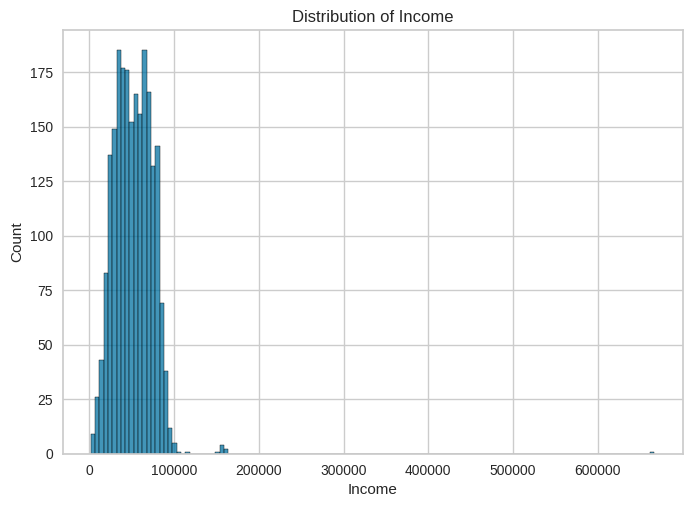

In [493]:
sns.histplot(raw_df['Income'])
plt.title('Distribution of Income')

In [494]:
raw_df['Income'].skew()

6.763487372811116

As we can see Income attribute highly imbalance

## **Univariant Analysis**
Dealing with categorical columns

<Axes: xlabel='Education', ylabel='count'>

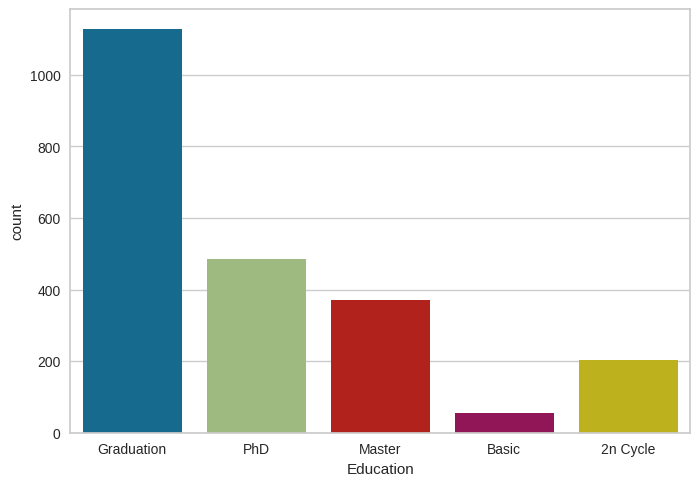

In [495]:
sns.countplot(data=raw_df, x='Education', hue='Education')

<Axes: xlabel='Marital_Status', ylabel='count'>

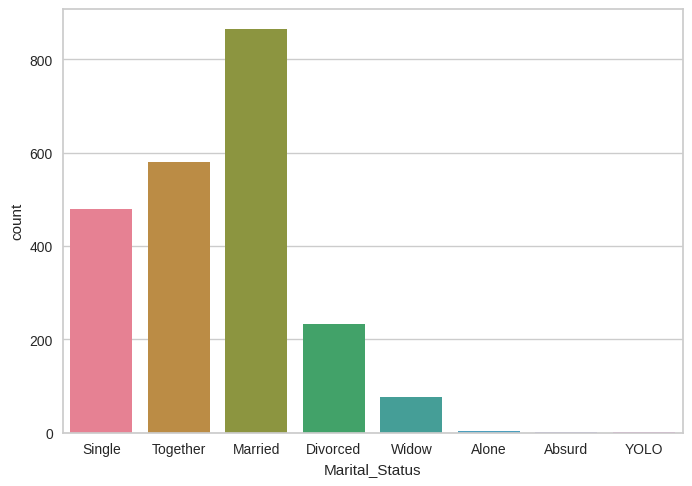

In [496]:
sns.countplot(x=raw_df['Marital_Status'], hue=raw_df['Marital_Status'])

<Axes: xlabel='Kidhome', ylabel='count'>

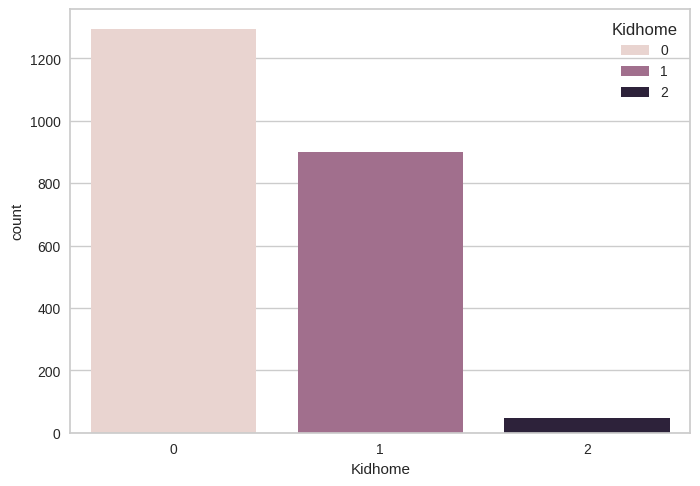

In [497]:
sns.countplot(data=raw_df, x='Kidhome', hue='Kidhome')

<Axes: xlabel='Teenhome', ylabel='count'>

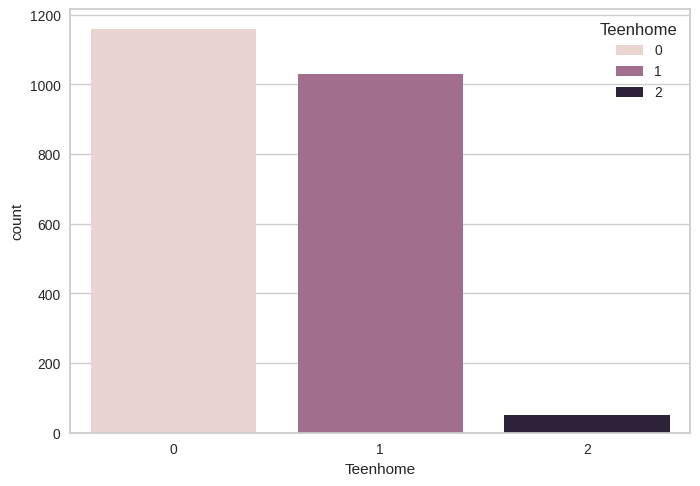

In [498]:
sns.countplot(data=raw_df, x='Teenhome', hue='Teenhome')

<Axes: xlabel='AcceptedCmp1', ylabel='count'>

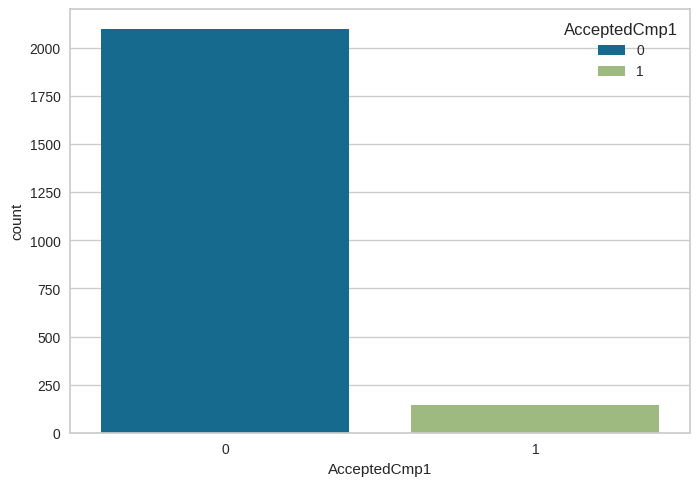

In [499]:
# Dealing with Promotion Category
sns.countplot(data=raw_df, x='AcceptedCmp1', hue='AcceptedCmp1')

<Axes: xlabel='AcceptedCmp2', ylabel='count'>

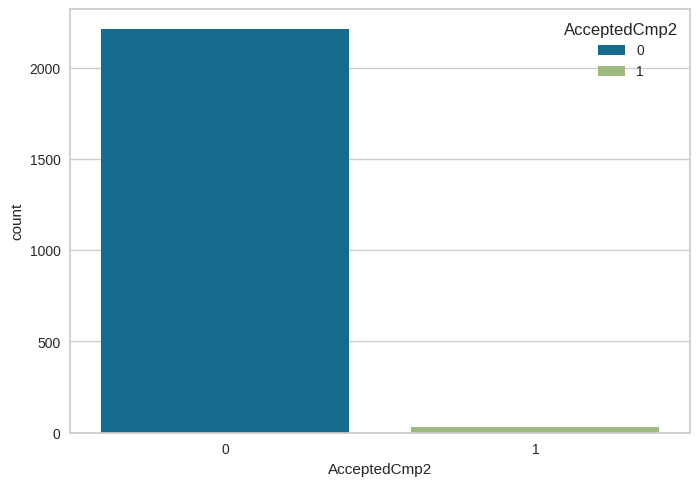

In [500]:
sns.countplot(data=raw_df, x='AcceptedCmp2', hue='AcceptedCmp2')

<Axes: xlabel='AcceptedCmp3', ylabel='count'>

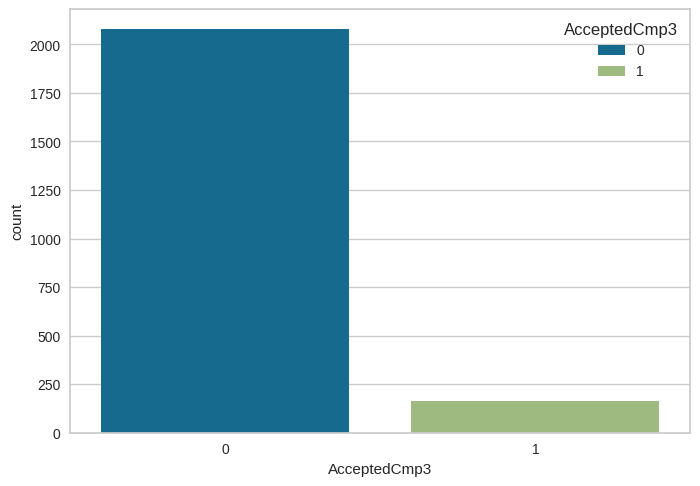

In [501]:
sns.countplot(data=raw_df, x='AcceptedCmp3', hue='AcceptedCmp3')

<Axes: xlabel='AcceptedCmp4', ylabel='count'>

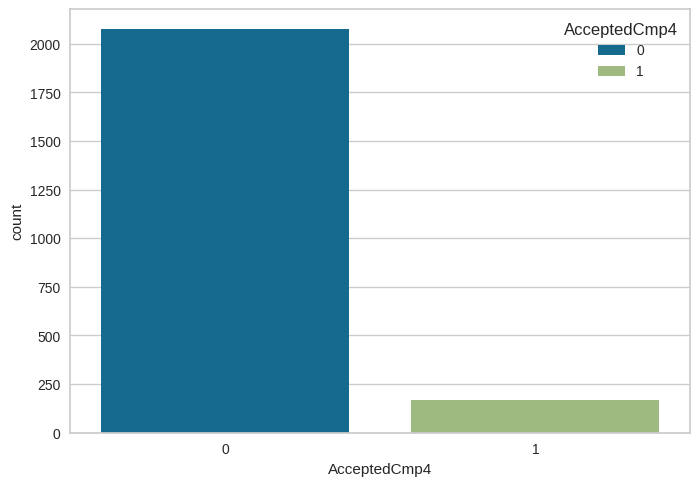

In [502]:
sns.countplot(data=raw_df, x='AcceptedCmp4', hue='AcceptedCmp4')

<Axes: xlabel='AcceptedCmp5', ylabel='count'>

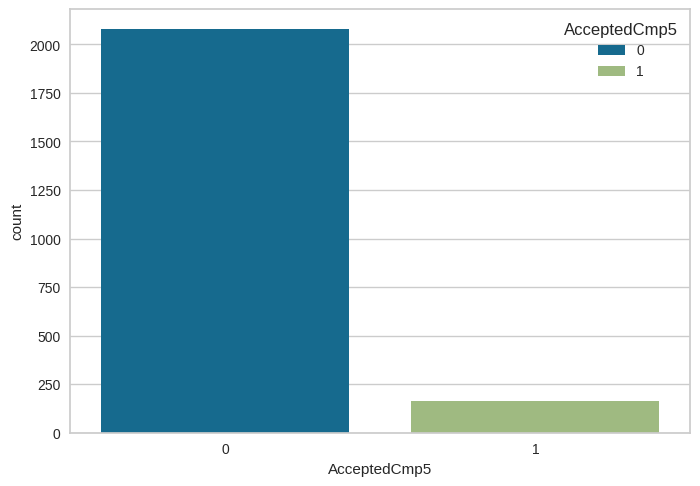

In [503]:
sns.countplot(data=raw_df, x='AcceptedCmp5', hue='AcceptedCmp5')

We can conclude from the above countplot that all the subset of Promotion highly imbalance means mostly customer had not accepted the offer from relative campaign

<Axes: xlabel='Response', ylabel='count'>

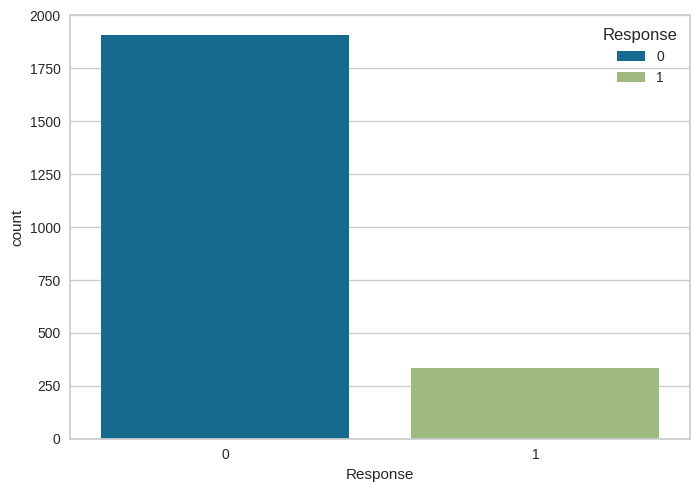

In [504]:
sns.countplot(data=raw_df, x='Response', hue='Response')

It is also highly imbalance hence customer had not accepted the offer from last campaign

**Dealing with Numerical columns**

Text(0.5, 1.0, 'Distribution of MntWines')

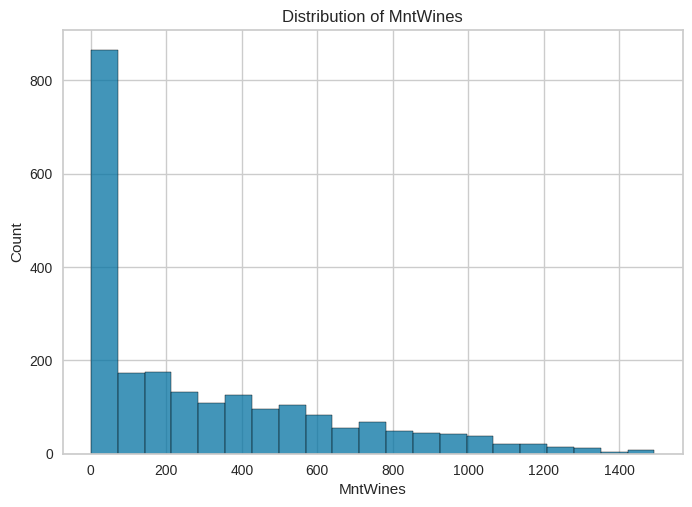

In [505]:
sns.histplot(raw_df['MntWines'])
plt.title('Distribution of MntWines')

Text(0.5, 1.0, 'Distribution of MntFruits')

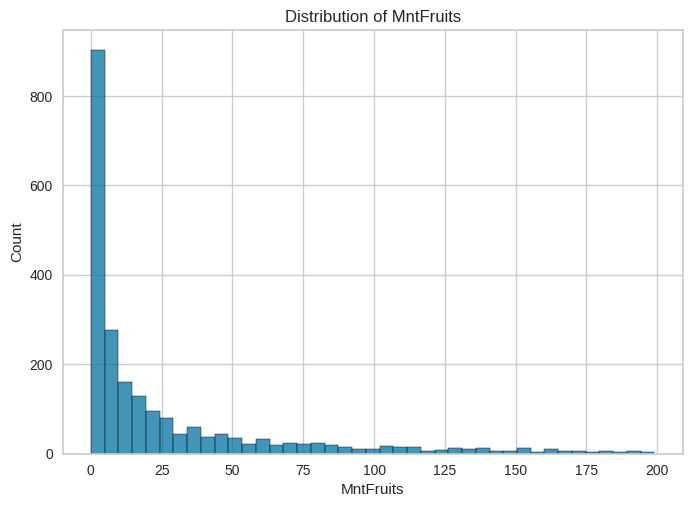

In [506]:
sns.histplot(raw_df['MntFruits'])
plt.title('Distribution of MntFruits')

Text(0.5, 1.0, 'Distribution of MntFishProducts')

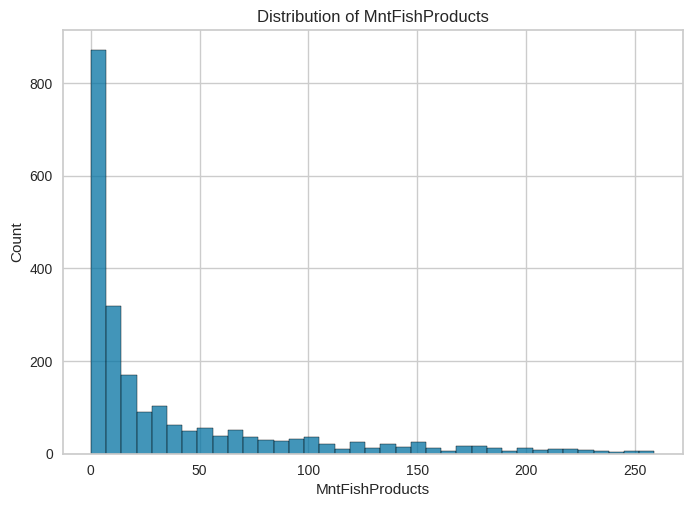

In [507]:
sns.histplot(raw_df['MntFishProducts'])
plt.title('Distribution of MntFishProducts')

Text(0.5, 1.0, 'Distribution of MntMeatProducts')

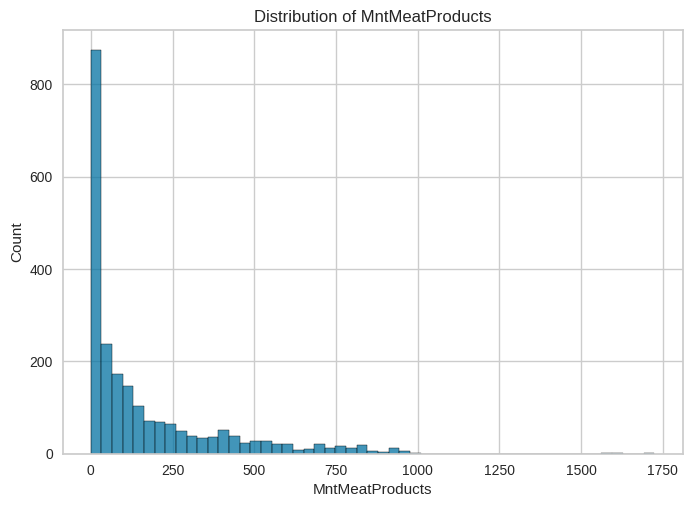

In [508]:
sns.histplot(raw_df['MntMeatProducts'])
plt.title('Distribution of MntMeatProducts')

Text(0.5, 1.0, 'Distribution of MntSweetProducts')

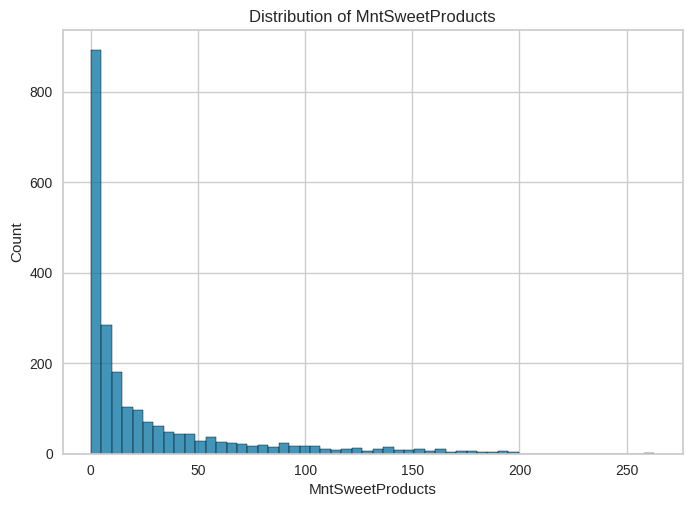

In [509]:
sns.histplot(raw_df['MntSweetProducts'])
plt.title('Distribution of MntSweetProducts')

Text(0.5, 1.0, 'Distribution of MntGoldProds')

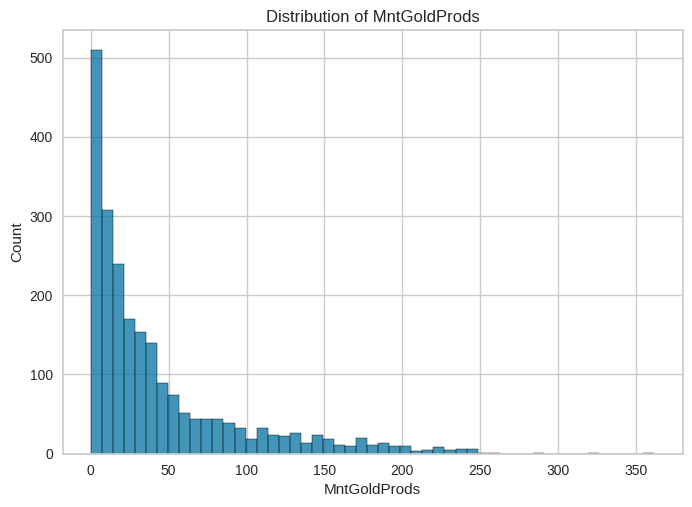

In [510]:
sns.histplot(raw_df['MntGoldProds'])
plt.title('Distribution of MntGoldProds')

We can conclude from the above distribution plot that Amount spent on different products by different customer in last two years is zero.

**Dealing with Defferent types of resourses uesd by the customer.**

Text(0.5, 1.0, 'Distribution of NumCatalogPurchases')

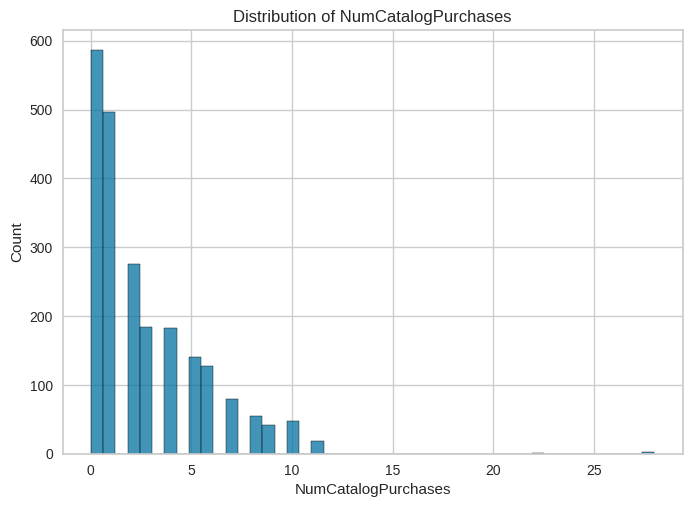

In [511]:
sns.histplot(raw_df['NumCatalogPurchases'])
plt.title('Distribution of NumCatalogPurchases')

The above distribution shows that around 600 times do not made any Purchases and around 500 times made only ones Purchases using Catalog by customer

## **BiVariant & MultiVariant Analysis**

<Axes: >

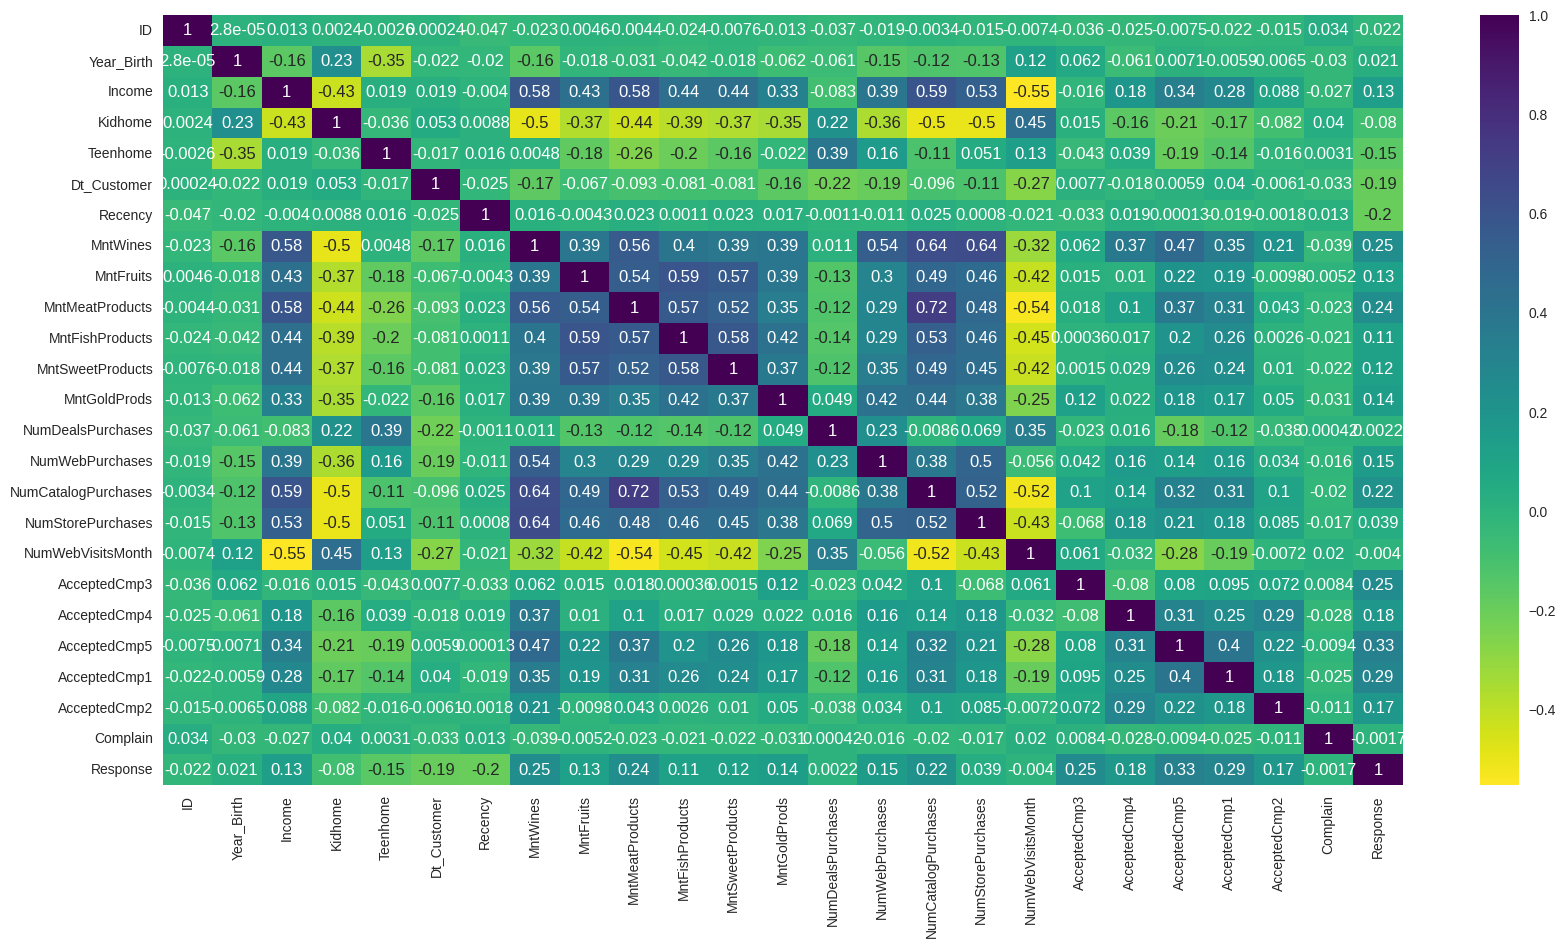

In [512]:
# Correlation Matrix
plt.figure(figsize=(20, 10))
sns.heatmap(raw_df.drop(['Education','Marital_Status', 'Z_CostContact', 'Z_Revenue'], axis=1).corr(), annot=True, cmap='viridis_r')

In [513]:
imp_cols=['Education', 'Marital_Status', 'Income','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

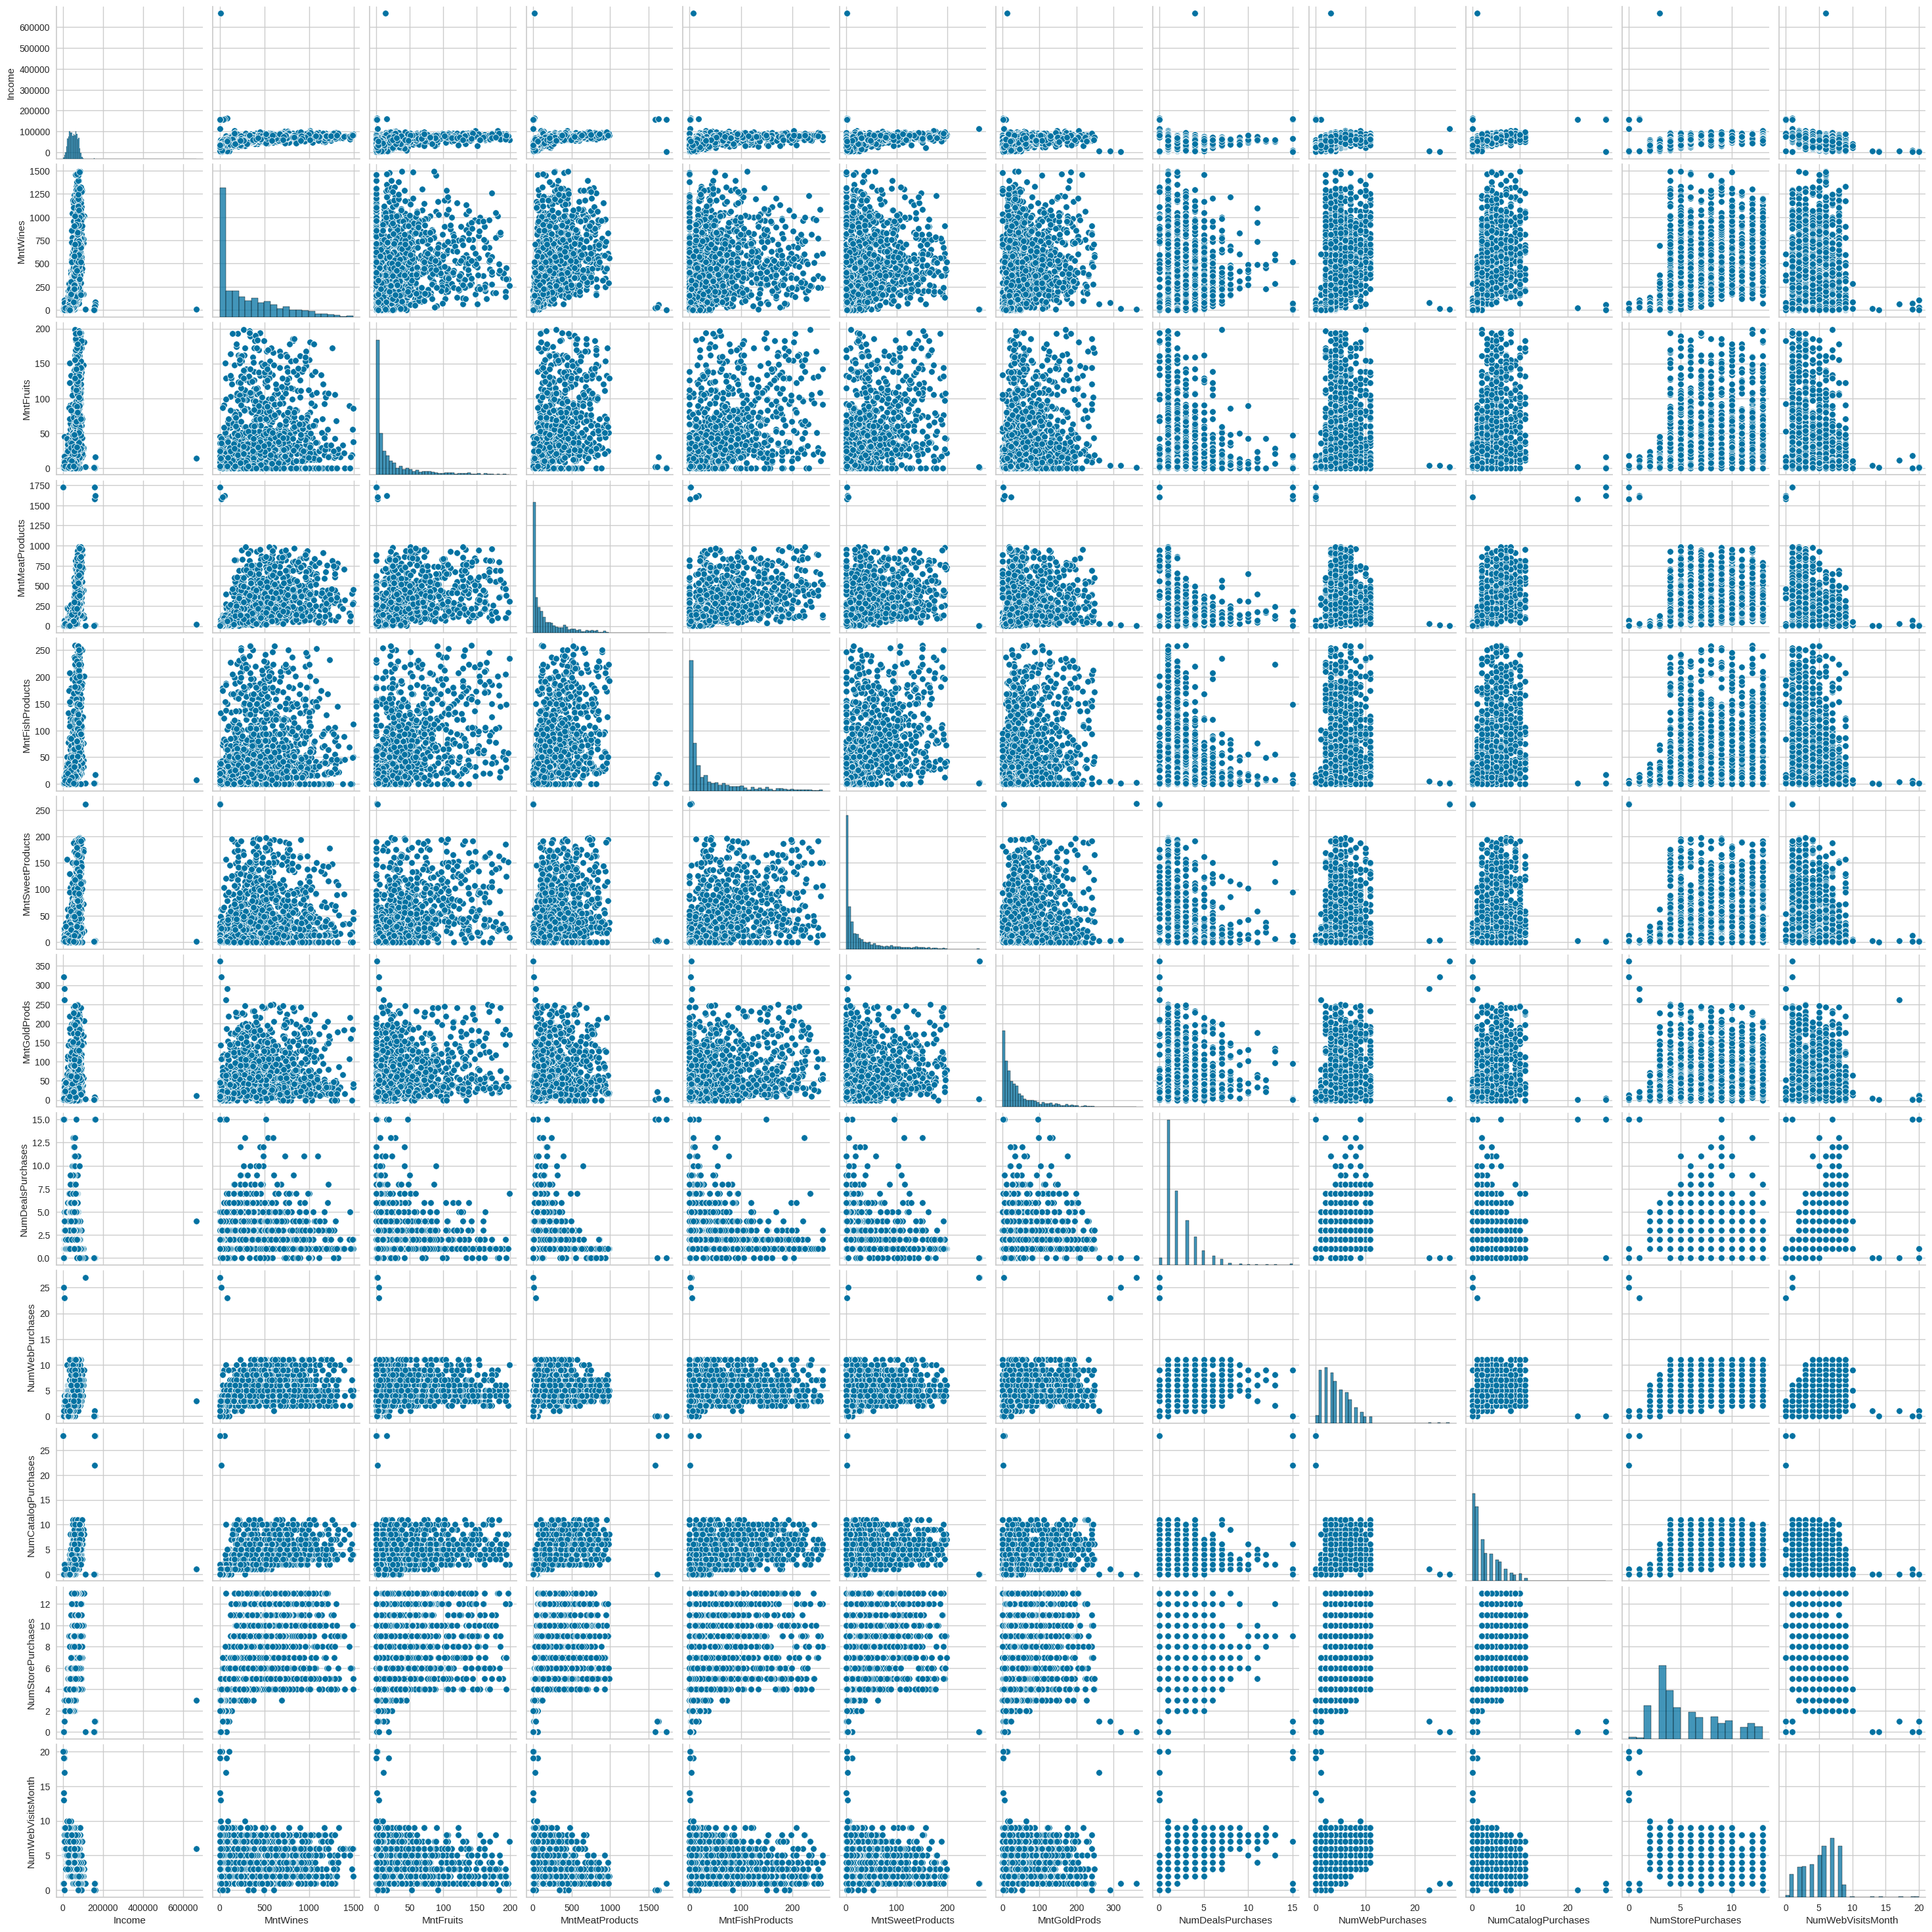

In [514]:
sns.pairplot(raw_df[imp_cols])

## **Data Cleaing and Feature Engineering**

In [515]:
raw_df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There is missing values in Income attribute hence, For the missing values, I am simply going to drop the rows that have missing income values.

In [516]:
raw_df=raw_df.dropna()

In [517]:
raw_df.shape

(2216, 29)

The total no. of rows after removing the rows with missing values are: 2216

In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

In [518]:
dates=raw_df['Dt_Customer'].dt.date

In [519]:
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [520]:
#taking it to be the newest customer
d1 = max(dates)
delta_days=d1-dates
delta_days

0       663 days, 0:00:00
1       113 days, 0:00:00
2       312 days, 0:00:00
3       139 days, 0:00:00
4       161 days, 0:00:00
              ...        
2235    381 days, 0:00:00
2236     19 days, 0:00:00
2237    155 days, 0:00:00
2238    156 days, 0:00:00
2239    622 days, 0:00:00
Name: Dt_Customer, Length: 2216, dtype: object

In [521]:
pd.set_option('display.max_columns', None)
# Extract number of days from each timedelta object
days = [delta.days for delta in delta_days]
raw_df['Customer_For']=days
raw_df.head()

<ipython-input-521-4284e8f82db9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['Customer_For']=days


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  Customer_For  
0              3         11         1           663  
1              3         11         0           113  
2              3         11         0           312  
3              3         11         0           139  
4              3         11         0           161

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.

In [522]:
print("Total categories in the feature Marital_Status:\n", raw_df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", raw_df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In the next step, we will performing feature engineering in order to create new features

First of all, We will extract the **"Age"** of a customer by the **"Year_Birth"** indicating the birth year of the respective person.

In [523]:
#Feature Engineering
#Age of customer today
raw_df["Age"] = 2024-raw_df["Year_Birth"]

<ipython-input-523-6689bf552c67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df["Age"] = 2024-raw_df["Year_Birth"]


In next step, We will create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of two years.

In [524]:
#Total spendings on various items
raw_df["Spent"] = raw_df["MntWines"]+ raw_df["MntFruits"]+ raw_df["MntMeatProducts"]+ raw_df["MntFishProducts"]+ raw_df["MntSweetProducts"]+ raw_df["MntGoldProds"]

<ipython-input-524-95505db2e550>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df["Spent"] = raw_df["MntWines"]+ raw_df["MntFruits"]+ raw_df["MntMeatProducts"]+ raw_df["MntFishProducts"]+ raw_df["MntSweetProducts"]+ raw_df["MntGoldProds"]


In next step, We will create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.

In [525]:
#Deriving living situation by marital status"Alone"
raw_df["Living_With"]=raw_df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In next step, We will create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.

In [526]:
#Feature indicating total children living in the household
raw_df["Children"]=raw_df["Kidhome"]+raw_df["Teenhome"]

To get further clarity of household, Creating feature indicating **"Family_Size"**

In [527]:
#Feature for total members in the householde
raw_df["Family_Size"] =raw_df["Living_With"].replace({"Alone": 1, "Partner":2})+ raw_df["Children"]

Create a feature **"Is_Parent"** to indicate parenthood status.

In [528]:
#Feature pertaining parenthood
raw_df["Is_Parent"] = np.where(raw_df.Children> 0, 1, 0)

Lastly, I will create three categories in the **"Education"** by simplifying its value counts.

In [529]:
#Segmenting education levels in three groups
raw_df["Education"]=raw_df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

To get more clarity, I'm going to rename some of the column's name.

In [530]:
#For clarity
raw_df=raw_df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

Finaly, Dropping some of the redundant features.

In [531]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
raw_df = raw_df.drop(to_drop, axis=1)

Now, We have some new features let's have a look at the data's stats.

In [532]:
raw_df.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean     26.356047   166.995939    37.637635    27.028881    43.965253   
std      39.793917   224.283273    54.752082    41.072046    51.815414   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    16.000000     3.000000     1.000000     9.000000   
50%       8.000000    68.000000    12.000000     8.000000    24.500000   
75%      33.000000   232.250000    50.000000    33.000000    56.000000   
max     199.000000  1725.000000   259.000000   262.000000   321.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2216.000000      2216.000000          2216.000000   
mean            2.323556         4.085289             2.671029   
std             1.923716         2.740951             2.926734   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2216.000000        2216.000000   2216.000000   2216.000000   
mean            5.800993           5.319043      0.073556      0.074007   
std             3.250785           2.425359      0.261106      0.261842   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2216.000000   2216.000000   2216.000000  2216.000000  2216.000000   
mean       0.073105      0.064079      0.013538     0.009477     0.150271   
std        0.260367      0.244950      0.115588     0.096907     0.357417   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

       Customer_For          Age        Spent     Children  Family_Size  \
count   2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean     353.521209    55.179603   607.075361     0.947202     2.592509   
std      202.434667    11.985554   602.900476     0.749062     0.905722   
min        0.000000    28.000000     5.000000     0.000000     1.000000   
25%      180.000000    47.000000    69.000000     0.000000     2.000000   
50%      355.500000    54.000000   396.500000     1.000000     3.000000   
75%      529.000000    65.000000  1048.000000     1.000000     3.000000   
max      699.000000   131.000000  2525.000000     3.000000     5.000000   

         Is_Parent  


The above stats show some discrepancies in mean Income and Age and max Income and age.

Do note that max-age is 131 years, As I calculated the age that would be today (i.e. 2024) and the data is old.

I must take a look at the broader view of the data. I will plot some of the selected features.

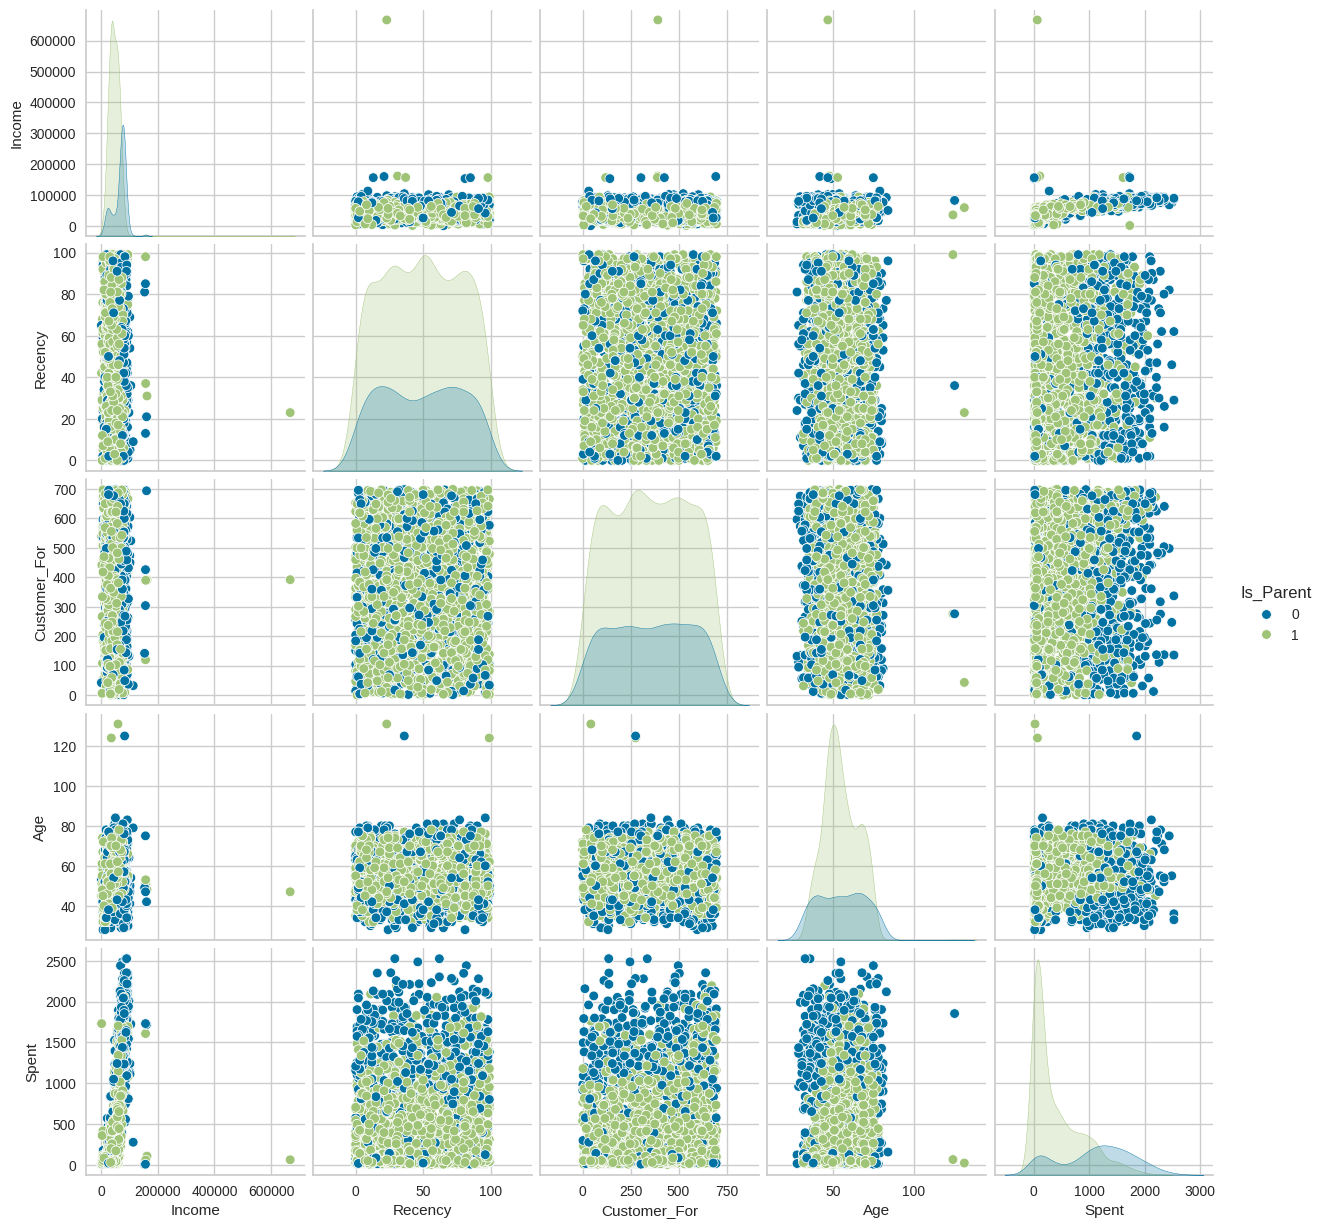

In [533]:
cols=[ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
sns.pairplot(raw_df[cols], hue= "Is_Parent")

Clearly, there are a few outliers in the Income and Age features. I will be deleting the outliers in the data.

In [534]:
# IQR
# Calculate the upper and lower limits
Q1 = raw_df['Income'].quantile(0.25)
Q3 = raw_df['Income'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(raw_df['Income'] >= upper)[0]
lower_array = np.where(raw_df['Income'] <= lower)[0]

# Removing the outliers
raw_df.drop(index=upper_array, inplace=True)
raw_df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", raw_df.shape)

New Shape:  (2208, 30)


In [535]:
# IQR
# Calculate the upper and lower limits
Q1 = raw_df['Age'].quantile(0.25)
Q3 = raw_df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(raw_df['Age'] >= upper)[0]
lower_array = np.where(raw_df['Age'] <= lower)[0]

# Removing the outliers
raw_df.drop(index=upper_array, inplace=True)
raw_df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", raw_df.shape)

New Shape:  (2205, 30)


Next, We will look at correlation matrix.

<Axes: >

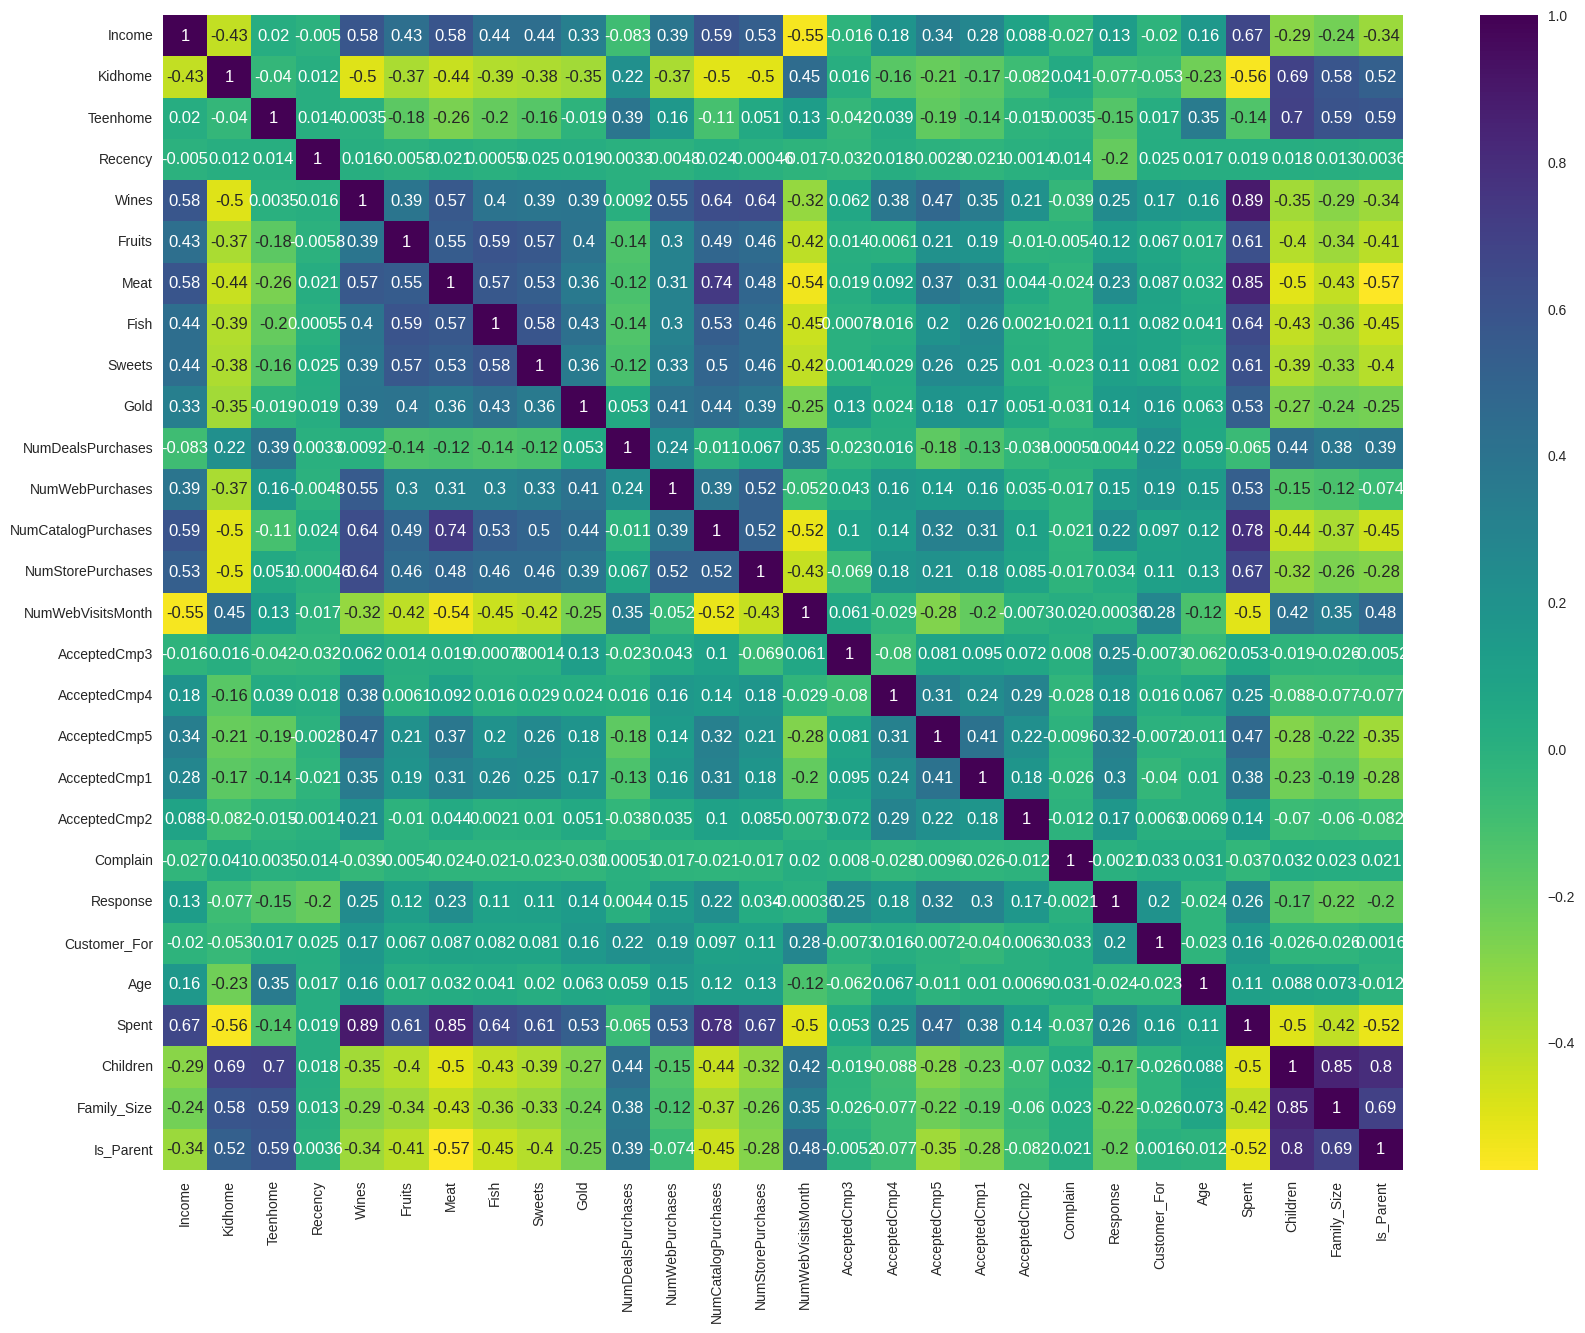

In [536]:
plt.figure(figsize=(20, 15))
sns.heatmap(raw_df.drop(['Education', 'Living_With'], axis=1).corr(), annot=True, cmap='viridis_r')

The data is quite clean and the new features have been included. I will proceed to the next step. That is, **preprocessing** the data.


In this section, I will be **preprocessing** the data to perform clustering operations.

The following steps are applied to preprocess the data:

* Label encoding the categorical features.
* Scaling the features using the standard scaler.
* Creating a subset dataframe for dimensionality reduction.

In [537]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [538]:
# Categorical cols
cat_cols=['Education', 'Living_With']

In [539]:
encoder=LabelEncoder()
for col in cat_cols:
  raw_df[col]=encoder.fit_transform(raw_df[col])

In [540]:
raw_df.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  Fish  \
0          0  58138.0        0         0       58    635      88   546   172   
1          0  46344.0        1         1       38     11       1     6     2   
2          0  71613.0        0         0       26    426      49   127   111   
3          0  26646.0        1         0       26     11       4    20    10   
4          1  58293.0        1         0       94    173      43   118    46   

   Sweets  Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0      88    88                  3                8                   10   
1       1     6                  2                1                    1   
2      21    42                  1                8                    2   
3       3     5                  2                2                    0   
4      27    15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Customer_For  \
0             0             0             0         0         1           663   
1             0             0             0         0         0           113   
2             0             0             0         0         0           312   
3             0             0             0         0         0           139   
4             0             0             0         0         0           161   

   Age  Spent  Living_With  Children  Family_Size  Is_Parent  
0   67   1617            0         0            1          0  
1   70     27            0         2            3          1  
2   59    776            1         0            2          0  
3   40     53            1         1            3          1  
4   43    422            1         1            3          1

In [541]:
#Creating a copy of data
ds = raw_df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [542]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.894509  0.233865 -0.823405 -0.926562  0.310886  0.981686  1.546546   
1  -0.894509 -0.233849  1.038757  0.910730 -0.379938 -0.870932 -0.637779   
2  -0.894509  0.768242 -0.823405 -0.926562 -0.794432  0.361178  0.567365   
3  -0.894509 -1.015011  1.038757 -0.926562 -0.794432 -0.870932 -0.562458   
4   0.568690  0.240012  1.038757 -0.926562  1.554370 -0.389964  0.416722   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.691991  2.448021  1.481294  0.848908           0.351255         1.427542   
1 -0.718701 -0.651792 -0.634123 -0.732089          -0.167859        -1.125953   
2 -0.178527  1.335735 -0.147821 -0.037993          -0.686973         1.427542   
3 -0.656201 -0.505918 -0.585493 -0.751369          -0.167859        -0.761168   
4 -0.218705  0.150513 -0.001930 -0.558565           1.389483         0.333187   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_For  \
0             2.501500          -0.554110           0.692876      1.530197   
1            -0.570613          -1.169478          -0.131176     -1.187105   
2            -0.229267           1.291993          -0.543202     -0.203936   
3            -0.911958          -0.554110           0.280850     -1.058651   
4             0.112079           0.061258          -0.131176     -0.949959   

        Age     Spent  Living_With  Children  Family_Size  Is_Parent  
0  0.987408  1.676967    -1.352979 -1.263319    -1.759393  -1.579384  
1  1.237656 -0.961799    -1.352979  1.406176     0.449239   0.633158  
2  0.320082  0.281243     0.739110 -1.263319    -0.655077  -1.579384  
3 -1.264818 -0.918649     0.739110  0.071429     0.449239   0.633158  
4 -1.014571 -0.306256     0.739110  0.071429     0.449239   0.633158

In [543]:
scaled_ds.describe()

Education        Income       Kidhome      Teenhome       Recency  \
count  2.205000e+03  2.205000e+03  2.205000e+03  2.205000e+03  2.205000e+03   
mean   8.539402e-17 -1.143958e-16  6.444832e-18  1.288966e-16 -4.914184e-17   
std    1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00   
min   -8.945087e-01 -2.003102e+00 -8.234051e-01 -9.265618e-01 -1.692503e+00   
25%   -8.945087e-01 -6.759440e-01 -8.234051e-01 -9.265618e-01 -8.635144e-01   
50%   -8.945087e-01 -3.441414e-02 -8.234051e-01 -9.265618e-01  1.566494e-05   
75%    5.686899e-01  6.509366e-01  1.038757e+00  9.107302e-01  8.635457e-01   
max    2.031888e+00  2.436621e+01  2.900920e+00  2.748022e+00  1.727076e+00   

              Wines        Fruits         Meat          Fish        Sweets  \
count  2.205000e+03  2.205000e+03  2205.000000  2.205000e+03  2.205000e+03   
mean   3.302976e-17 -5.961470e-17     0.000000 -2.980735e-17  8.056040e-18   
std    1.000227e+00  1.000227e+00     1.000227  1.000227e+00  1.000227e+00   
min   -9.035903e-01 -6.628866e-01    -0.745486 -6.882602e-01 -6.584386e-01   
25%   -8.323358e-01 -6.126722e-01    -0.674058 -6.335576e-01 -6.341235e-01   
50%   -3.869949e-01 -4.620291e-01    -0.441918 -4.694498e-01 -4.639175e-01   
75%    5.957241e-01  1.656505e-01     0.294683  2.234495e-01  1.439611e-01   
max    3.529036e+00  4.333443e+00     6.955334  4.034396e+00  5.712129e+00   

               Gold  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count  2.205000e+03       2.205000e+03     2.205000e+03         2.205000e+03   
mean  -9.667248e-18       1.127846e-17    -4.511382e-17         9.667248e-18   
std    1.000227e+00       1.000227e+00     1.000227e+00         1.000227e+00   
min   -8.477713e-01      -1.206086e+00    -1.490739e+00        -9.119585e-01   
25%   -6.742473e-01      -6.869726e-01    -7.611683e-01        -9.119585e-01   
50%   -3.850406e-01      -1.678586e-01    -3.159816e-02        -2.292668e-01   
75%    2.319337e-01       3.512553e-01     6.979720e-01         4.534249e-01   
max    5.341252e+00       6.580623e+00     8.358459e+00         8.645725e+00   

       NumStorePurchases  NumWebVisitsMonth  Customer_For           Age  \
count       2.205000e+03       2.205000e+03  2.205000e+03  2.205000e+03   
mean       -9.727668e-17      -1.192294e-16  8.700523e-17  2.819614e-18   
std         1.000227e+00       1.000227e+00  1.000227e+00  1.000227e+00   
min        -1.784845e+00      -2.191306e+00 -1.745387e+00 -2.265807e+00   
25%        -8.617938e-01      -9.552278e-01 -8.560886e-01 -6.809074e-01   
50%        -2.464261e-01       2.808504e-01  8.507604e-03 -9.699687e-02   
75%         6.766253e-01       6.928765e-01  8.681632e-01  8.205769e-01   
max         2.215044e+00       6.049215e+00  1.708057e+00  6.326019e+00   

              Spent   Living_With      Children   Family_Size     Is_Parent  
count  2.205000e+03  2.205000e+03  2.205000e+03  2.205000e+03  2.205000e+03  
mean   7.411557e-17  8.700523e-17  6.444832e-18  1.643432e-16  6.122590e-17  
std    1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00  1.000227e+00  
min   -9.983100e-01 -1.352979e+00 -1.263319e+00 -1.759393e+00 -1.579384e+00  
25%   -8.937552e-01 -1.352979e+00 -1.263319e+00 -6.550772e-01 -1.579384e+00  
50%   -3.494059e-01  7.391098e-01  7.142868e-02  4.492387e-01  6.331583e-01  
75%    7.309946e-01  7.391098e-01  7.142868e-02  4.492387e-01  6.331583e-01  
max    3.183885e+00  7.391098e-01  2.740924e+00  2.657870e+00  6.331583e-01

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why I will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**

* Dimensionality reduction with PCA

* Plotting the reduced dataframe

**Dimensionality reduction with PCA:**

For this project, I will be reducing the dimensions to 3.

In [544]:
from sklearn.decomposition import PCA

In [545]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(0.9)
pca.fit(scaled_ds)
X_pca = pd.DataFrame(
    pca.transform(scaled_ds), columns=[f"PC{i}" for i in range(2, pca.n_components_ + 2)]
)
pca.n_components_, pca.explained_variance_ratio_.sum()

(13, 0.9026803160757446)

In [546]:
X_pca.head()

PC2       PC3       PC4       PC5       PC6       PC7       PC8  \
0  5.013831 -0.090481  2.408045  0.224090  1.095362 -0.388135 -0.458235   
1 -2.894063 -0.051695 -1.518188  1.341365  1.743795  0.627493 -0.055824   
2  2.575245 -0.725168 -0.252862 -0.008835 -0.680170  0.529229 -1.602682   
3 -2.585112 -1.431827 -0.378171 -1.341713  0.281908  0.881536 -0.710563   
4 -0.684760  0.182904 -0.095450 -1.611696  0.275840 -0.956112  1.468686   

        PC9      PC10      PC11      PC12      PC13      PC14  
0 -0.995352  1.700487  0.699439  1.124380 -0.534412  1.257871  
1 -0.050108  0.943372  0.366567  0.136351 -0.420691  0.085035  
2  0.021146 -0.791943 -0.530602  0.945308 -0.304841 -1.011267  
3  0.797254 -0.658231  0.015298  0.400819  0.083406 -0.239622  
4  0.599572 -0.919725  0.352998  1.281861  0.563855 -0.289348

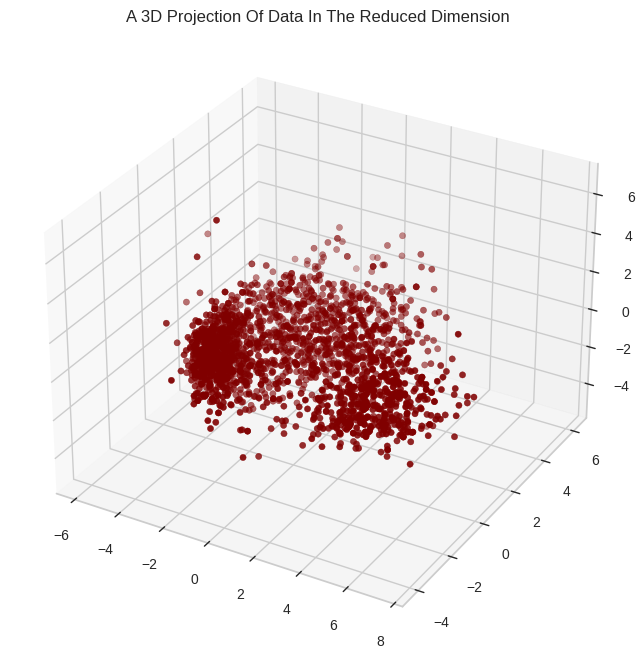

In [547]:
from mpl_toolkits.mplot3d import Axes3D
#A 3D Projection Of Data In The Reduced Dimension
x =X_pca.iloc[:, 0]
y =X_pca.iloc[:, 1]
z =X_pca.iloc[:, 2]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# **Clustering**

Now that I have reduced the attributes to three dimensions, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**

* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

In [548]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

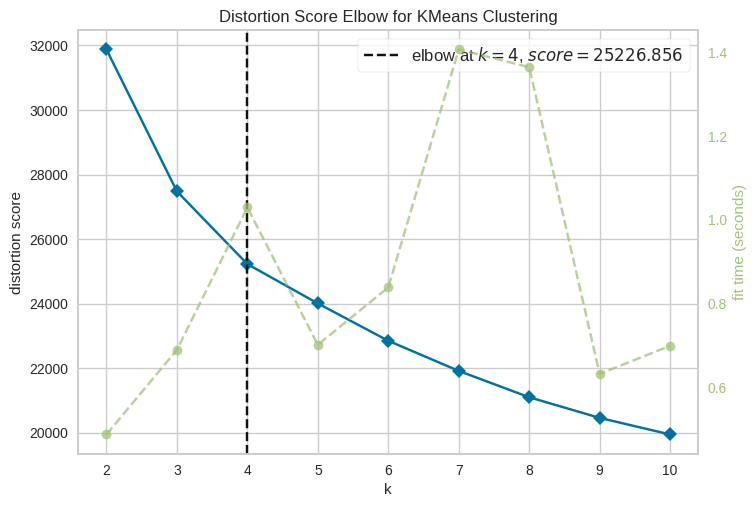

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [549]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_pca)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [550]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(X_pca)
X_pca["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
raw_df["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

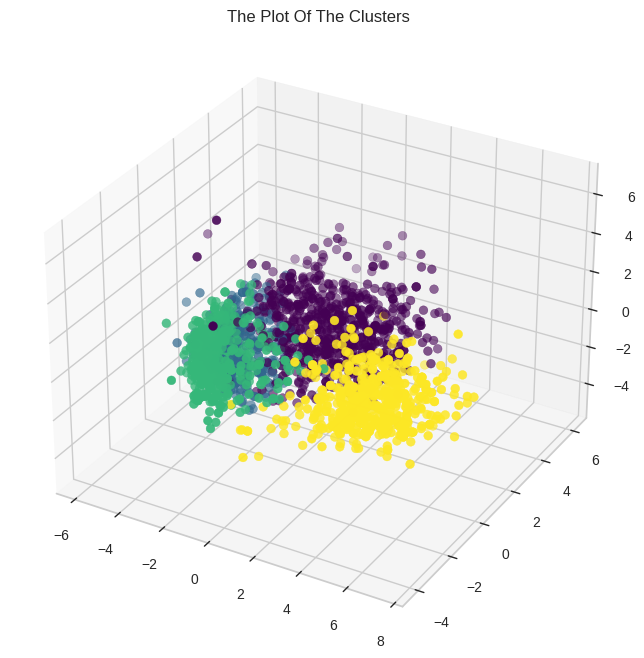

In [551]:
#Plotting the clusters
cmap = 'viridis'
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=X_pca["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

## **PROFILING**
Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

<Figure size 800x550 with 0 Axes>

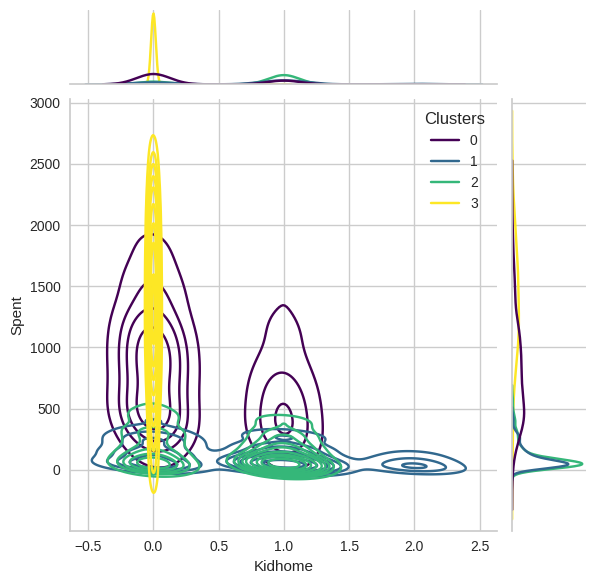

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

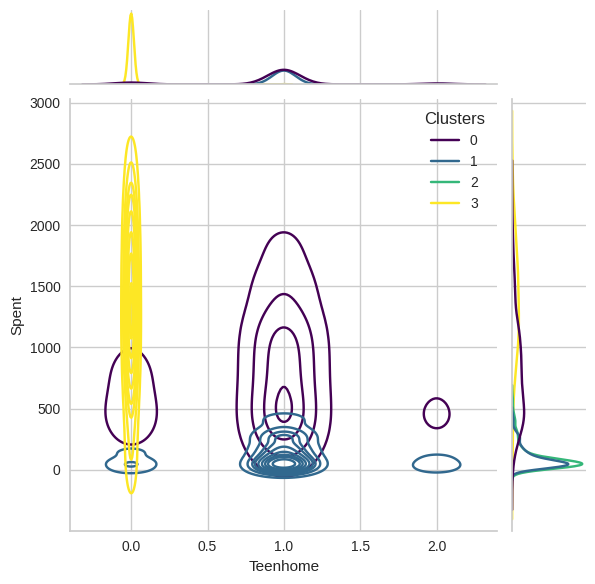

<Figure size 800x550 with 0 Axes>

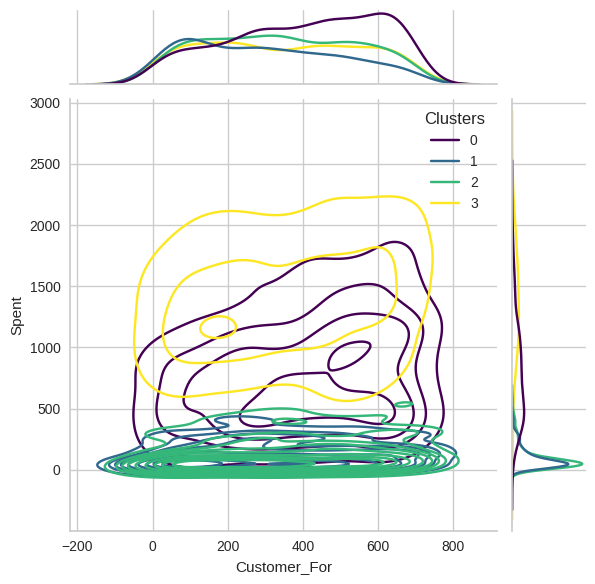

<Figure size 800x550 with 0 Axes>

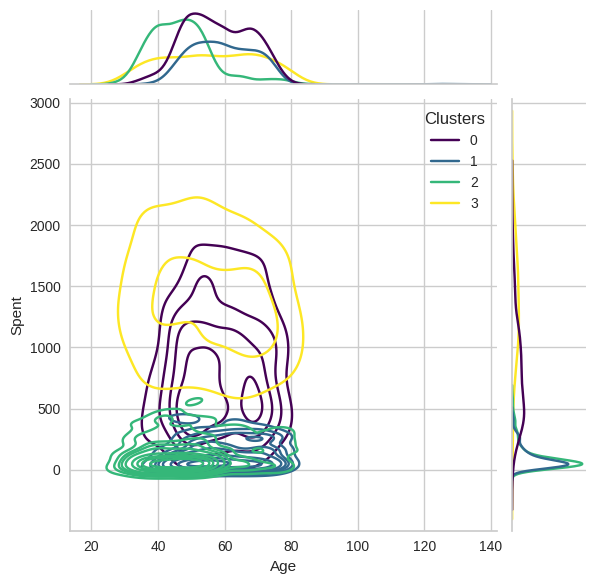

<Figure size 800x550 with 0 Axes>

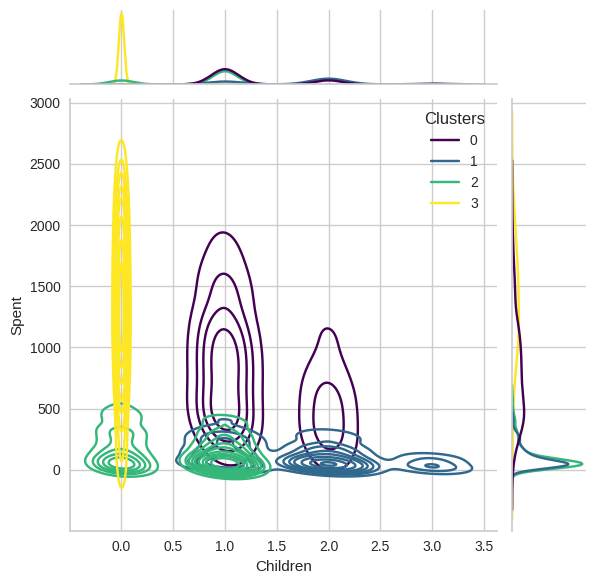

<Figure size 800x550 with 0 Axes>

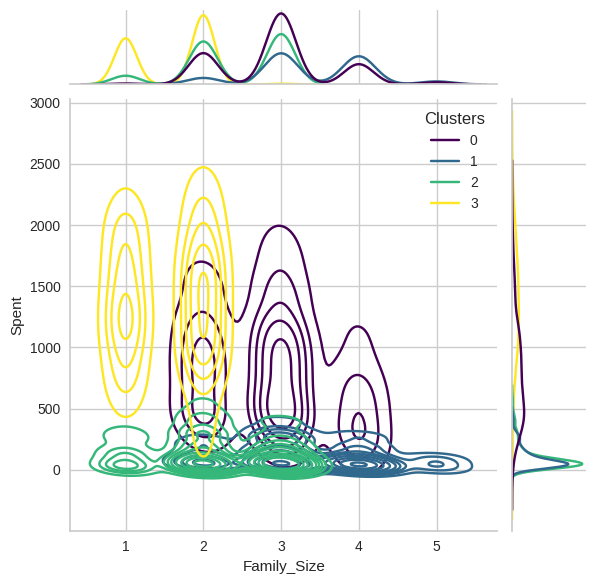

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

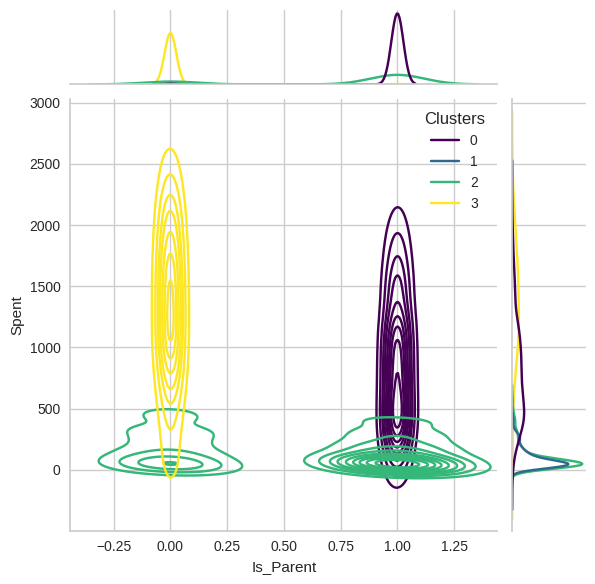

<Figure size 800x550 with 0 Axes>

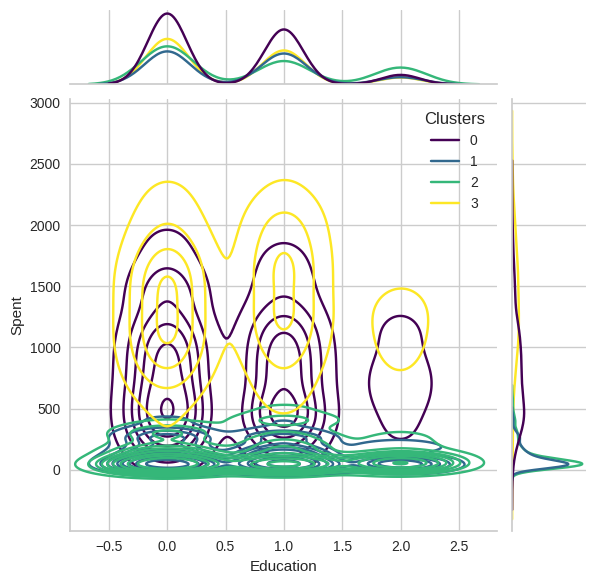

<Figure size 800x550 with 0 Axes>

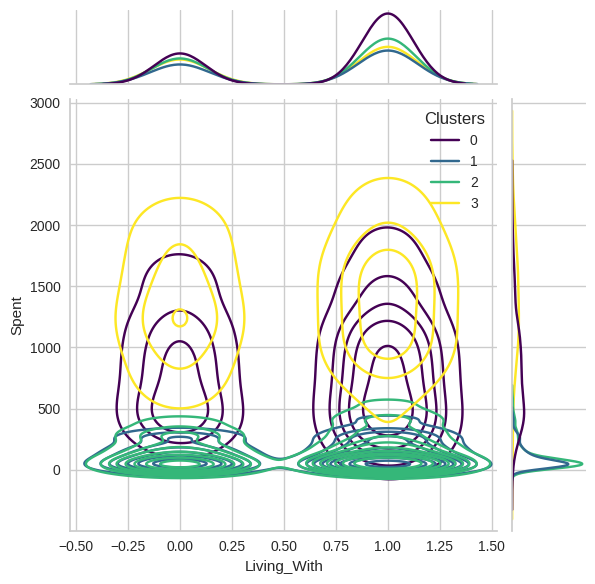

In [553]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=raw_df[i], y=raw_df["Spent"], hue =raw_df["Clusters"], kind="kde", palette=cmap)
    plt.show()

# **CONCLUSION**

In this project, I performed unsupervised clustering. I did use dimensionality reduction followed by agglomerative clustering. I came up with 4 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. This can be used in planning better marketing strategies.